In [1]:
%pip install -e . --quiet

import sys
from pathlib import Path

notebook_path = Path.cwd()
root = None
for p in [notebook_path] + list(notebook_path.parents):
	if (p / 'src').exists():
		root = p
		break
if root is None:
	root = notebook_path.parent
sys.path.insert(0, str(root))

Note: you may need to restart the kernel to use updated packages.


ERROR: file:///C:/Users/admin/finaniacal-week1/notebooks does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.financial_analyzer import (FinancialDataLoader, TechnicalAnalyzer, 
                                  PyNanceAnalyzer, FinancialVisualizer)
import warnings
warnings.filterwarnings('ignore')

In [3]:
class FinancialAnalysis:
    """Main class for financial analysis"""
    
    def __init__(self):
        self.data_loader = FinancialDataLoader()
        self.tech_analyzer = TechnicalAnalyzer()
        self.pynance_analyzer = PyNanceAnalyzer()
        self.visualizer = FinancialVisualizer()
        self.symbols = ['AAPL', 'GOOGL', 'MSFT', 'TSLA'] 
    
    def analyze_stock(self, symbol: str, period: str = "1y"):
        """Complete analysis for a single stock"""
        print(f"Analyzing {symbol}...")
        
        # Load data
        data = self.data_loader.load_stock_data(symbol, period=period)
        data = self.data_loader.prepare_data(data)
        
        # Calculate technical indicators
        data = self.tech_analyzer.calculate_all_indicators(data)
        
        # Calculate PyNance metrics
        data = self.pynance_analyzer.calculate_returns(data)
        data = self.pynance_analyzer.calculate_support_resistance(data)
        data = self.pynance_analyzer.calculate_trend_indicators(data)
        
        # Create visualizations
        self.visualizer.plot_price_indicators(data, symbol)
        self.visualizer.plot_volume_analysis(data, symbol)
        self.visualizer.plot_returns_analysis(data, symbol)
        
        return data
    
    def comparative_analysis(self, symbols: list = None):
        """Comparative analysis of multiple stocks"""
        if symbols is None:
            symbols = self.symbols
        
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        
        for i, symbol in enumerate(symbols):
            try:
                data = self.data_loader.load_stock_data(symbol, period="6mo")
                data = self.pynance_analyzer.calculate_returns(data)
                
                row, col = i // 2, i % 2
                axes[row, col].plot(data.index, data['Cumulative_Return'], label=symbol, linewidth=2)
                axes[row, col].set_title(f'{symbol} - Cumulative Returns (6 Months)')
                axes[row, col].set_ylabel('Cumulative Return')
                axes[row, col].grid(True, alpha=0.3)
                axes[row, col].legend()
            
            except Exception as e:
                print(f"Error analyzing {symbol}: {e}")
        
        plt.tight_layout()
        plt.savefig('notebooks/comparative_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    def generate_report(self, symbol: str, data: pd.DataFrame):
        """Generate analysis report"""
        print(f"\n{'='*50}")
        print(f"FINANCIAL ANALYSIS REPORT: {symbol}")
        print(f"{'='*50}")
        
        # Basic statistics
        latest_close = data['Close'].iloc[-1]
        daily_return = data['Daily_Return'].iloc[-1]
        volatility = data['Volatility_20D'].iloc[-1] if 'Volatility_20D' in data.columns else None
        
        print(f"Latest Close Price: ${latest_close:.2f}")
        print(f"Latest Daily Return: {daily_return:.2%}")
        if volatility:
            print(f"20-Day Volatility: {volatility:.2%}")
        
        # Technical signals
        if 'RSI' in data.columns:
            rsi = data['RSI'].iloc[-1]
            rsi_signal = "Overbought" if rsi > 70 else "Oversold" if rsi < 30 else "Neutral"
            print(f"RSI: {rsi:.2f} ({rsi_signal})")
        
        if 'MACD' in data.columns and 'MACD_Signal' in data.columns:
            macd_signal = "Bullish" if data['MACD'].iloc[-1] > data['MACD_Signal'].iloc[-1] else "Bearish"
            print(f"MACD Signal: {macd_signal}")
        
        # Support and Resistance
        if 'Support' in data.columns and 'Resistance' in data.columns:
            support = data['Support'].iloc[-1]
            resistance = data['Resistance'].iloc[-1]
            print(f"Support Level: ${support:.2f}")
            print(f"Resistance Level: ${resistance:.2f}")
        
        print(f"{'='*50}")


Analyzing AAPL...
Loaded data for AAPL. Shape: (250, 7)
Failed to analyze AAPL: input array type is not double
Analyzing GOOGL...
Loaded data for GOOGL. Shape: (250, 7)
Failed to analyze GOOGL: input array type is not double
Loaded data for AAPL. Shape: (128, 7)
Loaded data for GOOGL. Shape: (128, 7)
Loaded data for MSFT. Shape: (128, 7)
Loaded data for TSLA. Shape: (128, 7)


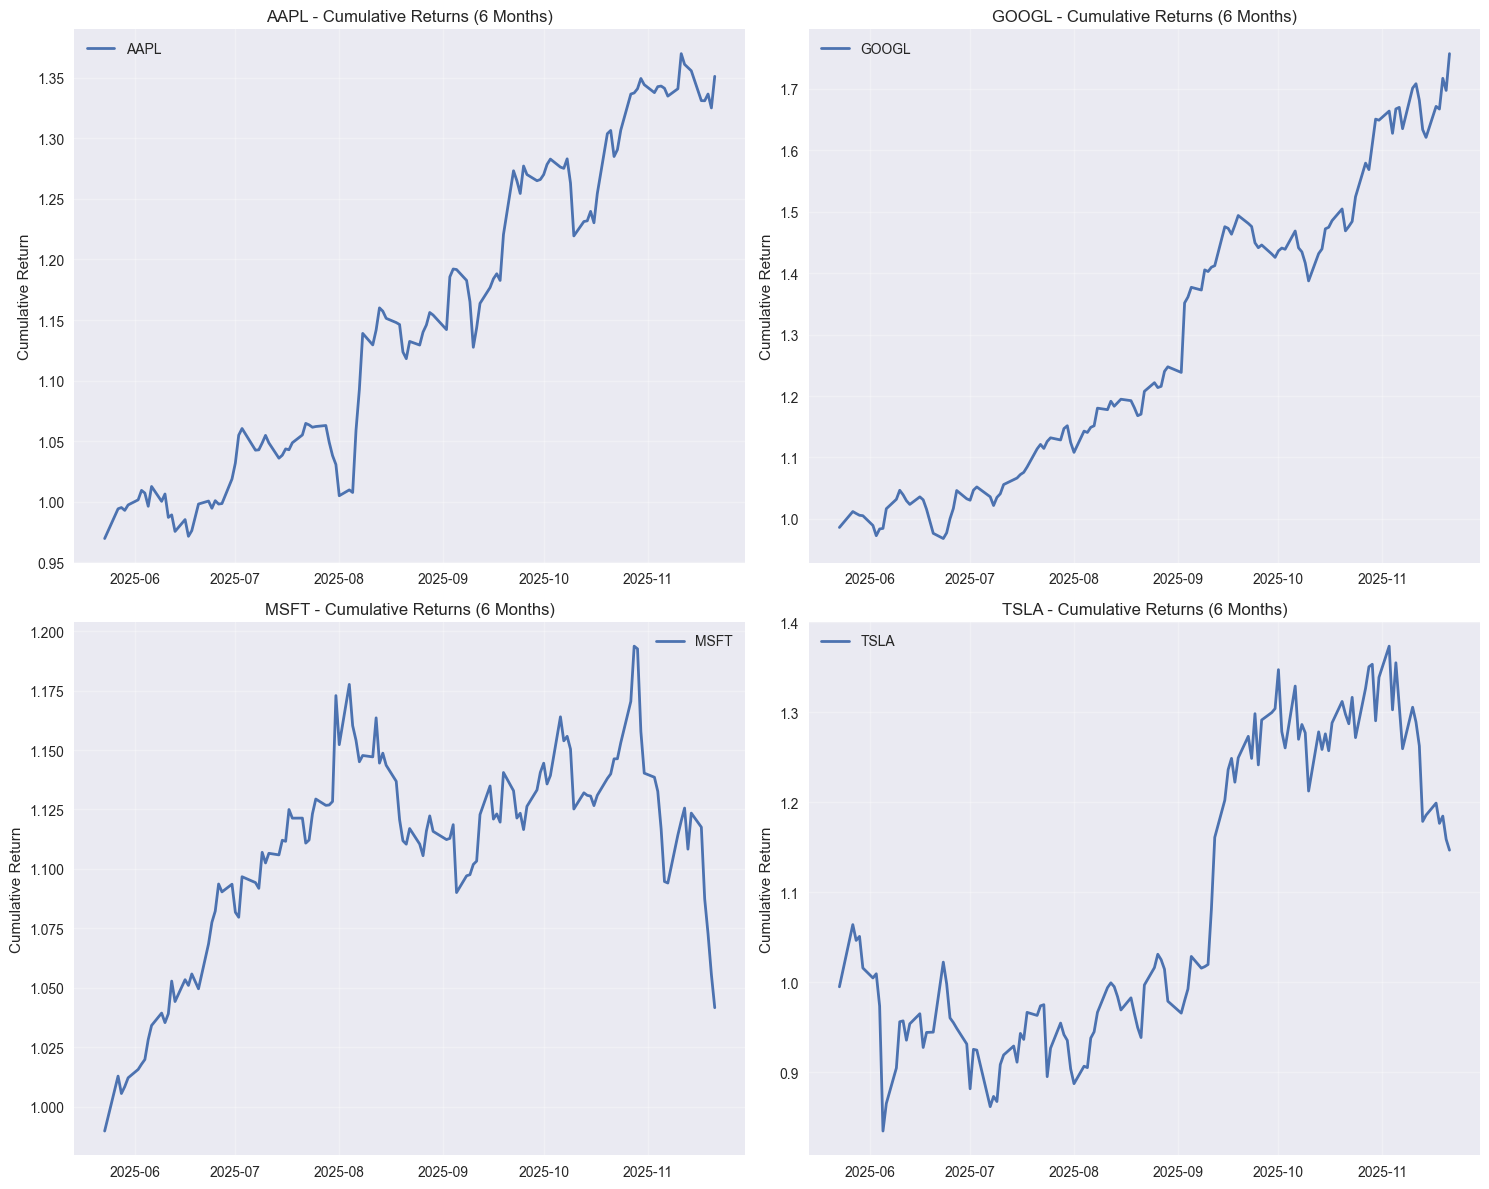

In [4]:

# Main execution 
analyzer = FinancialAnalysis()

# Analyze individual stocks
for symbol in ['AAPL', 'GOOGL']:
    try:
        data = analyzer.analyze_stock(symbol, period="1y")
        analyzer.generate_report(symbol, data)
    except Exception as e:
        print(f"Failed to analyze {symbol}: {e}")

# Perform comparative analysis
analyzer.comparative_analysis()